# Clustering and Manifold Learning

## Task 2
> Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster the loans_train dataset after it has been prepared for ML (i.e. the result of the example notebook for e-tivity 2). Use the k-Means clustering algorithm and visualise the clustering. Pick a value of k suggested by the MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.preprocessing import RobustScaler #need for scaling attributes with outliers
from sklearn.cluster import KMeans

In [2]:
# Load the dataset iris_nolabels
df = pd.read_csv("C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week3/loans_train_prepared.csv")
df

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0,0.000000,1.084523,1.058140,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.841086
1,1,0.333333,0.925883,1.047319,0.750,1.0,1,0,1,0,0,0,0,0,0,0,0.871711
2,2,0.000000,0.683858,0.635920,0.750,1.0,1,0,1,0,1,0,0,0,1,1,0.385189
3,3,0.000000,0.608992,1.002824,0.750,1.0,1,0,1,0,0,0,1,0,1,1,0.717012
4,4,0.000000,1.101869,1.115650,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.860305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708
610,610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496
611,611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075
612,612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256


In [3]:
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


In [4]:
data[0]

array([0.        , 0.        , 1.08452321, 1.05814015, 0.75      ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.84108572])

### B. Rescale the Data

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)
data[0]

array([0.        , 0.        , 0.32208146, 0.42877167, 0.74358974,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.26094651])

### C. Scatterplot Function (to be used below for visualising a clustering)

In [6]:
colors = np.array(['orange', 'blue', 'lime', 'pink', 'green', 'purple','yellow', 'purple','brown', 'khaki'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

In [7]:
# Run k-Means
# Number of clusters k
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### E. Apply a manifold-learning technique to project the data set to a 2D space

In [8]:
# Append the cluster centers to the dataset.

data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

# Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


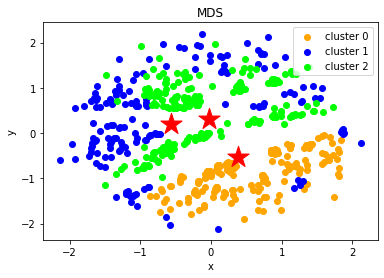

In [9]:
# Plot the transformed examples and the centers.

clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [10]:
# Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


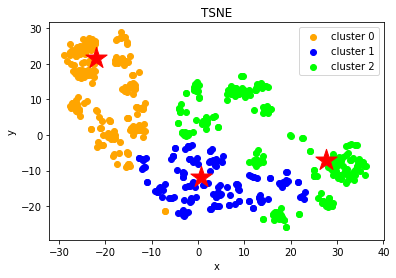

In [11]:
# Plot the transformed examples and the centers

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### F. Cluster Analysis

In [12]:
# Add the cluster labels as an extra column in the original dataframe

df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.084523,1.058140,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,2
1,1,0.333333,0.925883,1.047319,0.750,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,1
2,2,0.000000,0.683858,0.635920,0.750,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,2
3,3,0.000000,0.608992,1.002824,0.750,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,2
4,4,0.000000,1.101869,1.115650,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,2
610,610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,2
611,611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,2
612,612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,2


In [13]:
# Compute the mean value of each attribute for each cluster

df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,304.903382,0.239936,0.928601,1.079824,0.720169,0.980676,0.748792,0.019324,0.652174,0.009662,0.144928,0.043478,0.198068,1.000000,0.000000,0.864734,0.867650
1,301.835366,0.239837,0.893303,1.080560,0.722104,0.500000,0.780488,0.030488,0.603659,0.000000,0.128049,0.048780,0.280488,0.158537,0.420732,0.000000,0.846163
2,311.008230,0.260631,0.922071,1.070226,0.701646,0.987654,0.847737,0.016461,0.674897,0.004115,0.127572,0.061728,0.193416,0.000000,0.547325,1.000000,0.869608


### Description of the clusters:
>Cluster 0 - Have had their loan applications rejected with only half having a credit history.  Compared to the other clusters they are least likely to be married or have graduated with an education.<br><br>
>Cluster 1 - Have had their loan applicatons accepted with almost all having a credit history and they do not live in an semi-urban area.  Compared to the other clusters they are the most likely to be male<br><br>
>Cluster 2 - Have mostly had the loan applicatons accepted with almost all having a credit history and they live in an semi-urban area.  Compared to the other clusters they are least likely to be male.

## Task 3
> Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), then compute a new k-Means clustering.

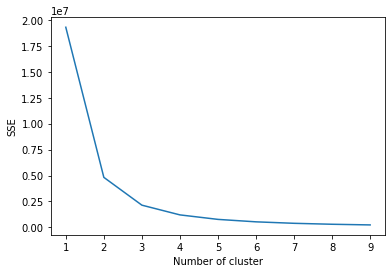

In [14]:
# Use Elbow method to determine value of k, adapted from Prakash (2018)
# We are looking for a small value of k that has a low SSE which is can be found at the elbow on the plot
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df.values)
    df["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The elbow method suggests k is 3

In [15]:
# Use Silhouette Coefficient method to determine value of k, adapted from Prakash (2018)
# In general we are looking for the n_cluster (k) that has the largest Silhouette Coefficient
# Subject to the amount of known clusters

from sklearn.metrics import silhouette_score

X = df.values.data

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6249283463205867
For n_clusters=3, The Silhouette Coefficient is 0.5872223986268577
For n_clusters=4, The Silhouette Coefficient is 0.567379625374137
For n_clusters=5, The Silhouette Coefficient is 0.5550584927567692
For n_clusters=6, The Silhouette Coefficient is 0.5465117166625248
For n_clusters=7, The Silhouette Coefficient is 0.5385239943445626
For n_clusters=8, The Silhouette Coefficient is 0.5331442910853087
For n_clusters=9, The Silhouette Coefficient is 0.5341993378613423
For n_clusters=10, The Silhouette Coefficient is 0.5260078805155722


The Silhouette Coefficient method suggests k is 2

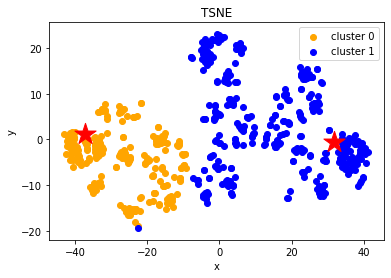

In [16]:
k = 2
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [17]:
# Add the new cluster labels as an extra column in the original dataframe

df['cluster2'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

# Compute the mean value of each attribute for each cluster

df.groupby('cluster2').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster,clusters
cluster2,,,,,,,,,,,,,,,,,,,
0,305.519313,0.248927,0.914184,1.078738,0.723498,0.871245,0.738197,0.025751,0.648069,0.008584,0.137339,0.042918,0.197425,1.0,0.000000,0.768240,0.851417,0.111588,4.051502
1,307.099738,0.247594,0.918059,1.074684,0.707152,0.845144,0.832021,0.018373,0.648294,0.002625,0.131234,0.057743,0.230971,0.0,0.530184,0.637795,0.869577,1.637795,3.942257


### Description of the clusters:
>Cluster 0 - Do not live in an semi-urban area and compared to cluster 1 are more likely to be male and less likely to have thieir loan applications accepted.<br><br>
>Cluster 1 - Live in an semi-urban area and compared to cluster 0 are less likely to be male and more likely have thieir loan applications accepted.

# Task 4
> Apply another clustering algorithm (from the ones available in scikit-learn) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

### Reference List:
> Prakash, O. (2018) ‘Scikit Learn - K-Means - Elbow - criterion’, stackoverflow,
    23 Mar, available: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion 
    [accessed 29 Mar 2020]